<a href="https://colab.research.google.com/github/jonas-eschle/applied_stats_physics/blob/main/applied_stats_module3_syr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install -U zfit scipy mplhep iminuit

# $\chi^2$ and goodness of fit

Remember
- **p-value**: probability to accept H1 (alternative) although H0 is true -> probability to say that the fit is bad (i.e. H1, something we did not fit) although it's actually good (the function fits well)
- we need distribution of H0! -> $\chi^2$ is a NLL (negative log-likelihood) of multiple Gaussian distributions $G(y_i;  \mu =f(x_i), \sigma = \sigma_i $ -> H0 is that $y_i$ is distributed around $f(x_i)$ with width $\sigma_i$.

(forward reference for HEP statistics, fits: pull studies with toys)



In [8]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import mplhep

mplhep.style.use(mplhep.style.LHCb2)

In [3]:
data = np.array([[ 30.        , 479.        ,  21.88606863],
       [ 45.        , 380.        ,  19.49358869],
       [ 60.        , 302.        ,  17.3781472 ],
       [ 75.        , 185.        ,  13.60147051],
       [ 90.        , 157.        ,  12.52996409],
       [105.        , 137.        ,  11.70469991],
       [120.        , 119.        ,  10.90871211],
       [135.        , 119.        ,  10.90871211],
       [150.        ,  89.        ,   9.43398113],
       [165.        ,  74.        ,   8.60232527],
       [180.        ,  61.        ,   7.81024968],
       [195.        ,  66.        ,   8.1240384 ],
       [210.        ,  68.        ,   8.24621125],
       [225.        ,  48.        ,   6.92820323],
       [240.        ,  54.        ,   7.34846923],
       [255.        ,  51.        ,   7.14142843],
       [270.        ,  46.        ,   6.78232998],
       [285.        ,  55.        ,   7.41619849],
       [300.        ,  29.        ,   5.38516481],
       [315.        ,  28.        ,   5.29150262],
       [330.        ,  37.        ,   6.08276253],
       [345.        ,  49.        ,   7.        ],
       [360.        ,  26.        ,   5.09901951],
       [375.        ,  35.        ,   5.91607978],
       [390.        ,  29.        ,   5.38516481],
       [405.        ,  31.        ,   5.56776436],
       [420.        ,  24.        ,   4.89897949],
       [435.        ,  25.        ,   5.        ],
       [450.        ,  35.        ,   5.91607978],
       [465.        ,  24.        ,   4.89897949],
       [480.        ,  30.        ,   5.47722558],
       [495.        ,  26.        ,   5.09901951],
       [510.        ,  28.        ,   5.29150262],
       [525.        ,  21.        ,   4.58257569],
       [540.        ,  18.        ,   4.24264069],
       [555.        ,  20.        ,   4.47213595],
       [570.        ,  27.        ,   5.19615242],
       [585.        ,  17.        ,   4.12310563],
       [600.        ,  17.        ,   4.12310563],
       [615.        ,  14.        ,   3.74165739],
       [630.        ,  17.        ,   4.12310563],
       [645.        ,  24.        ,   4.89897949],
       [660.        ,  11.        ,   3.31662479],
       [675.        ,  22.        ,   4.69041576],
       [690.        ,  17.        ,   4.12310563],
       [705.        ,  12.        ,   3.46410162],
       [720.        ,  10.        ,   3.16227766],
       [735.        ,  13.        ,   3.60555128],
       [750.        ,  16.        ,   4.        ],
       [765.        ,   9.        ,   3.        ],
       [780.        ,   9.        ,   3.        ],
       [795.        ,  14.        ,   3.74165739],
       [810.        ,  21.        ,   4.58257569],
       [825.        ,  17.        ,   4.12310563],
       [840.        ,  13.        ,   3.60555128],
       [855.        ,  12.        ,   3.46410162],
       [870.        ,  18.        ,   4.24264069],
       [885.        ,  10.        ,   3.16227766]])


x = data[:, 0]
y = data[:, 1]
sigma = data[:, 2]

In [13]:
# define models

def linear(x, a, m):
    return a + m * x

def exponential(x, scale, lam):
    return scale * np.exp(-x * lam)


def func(x, params):
    return exponential(x, params[0], params[1]) + exponential(x, params[2], params[3]) + linear(x, params[4], params[5])

## Normalization

Note that these are functions, not PDFs. But in the Likelihood, we need PDFs?

Yes, but remember: the functions here are the $\mu$ in our Gaussians that we fit, *not* the PDF that we fit.
(i.e. that's what the $\chi^2$ is doing)

In [36]:
# define loss/cost

def chi2(params):  # is a function of params, it's an NLL!
    pred = func(x, params)
    chi = (y - pred) / sigma
    return np.sum(chi ** 2)

## Next step: optimization

Problem: local optimizers need good starting values.

Hint: why not plot first?

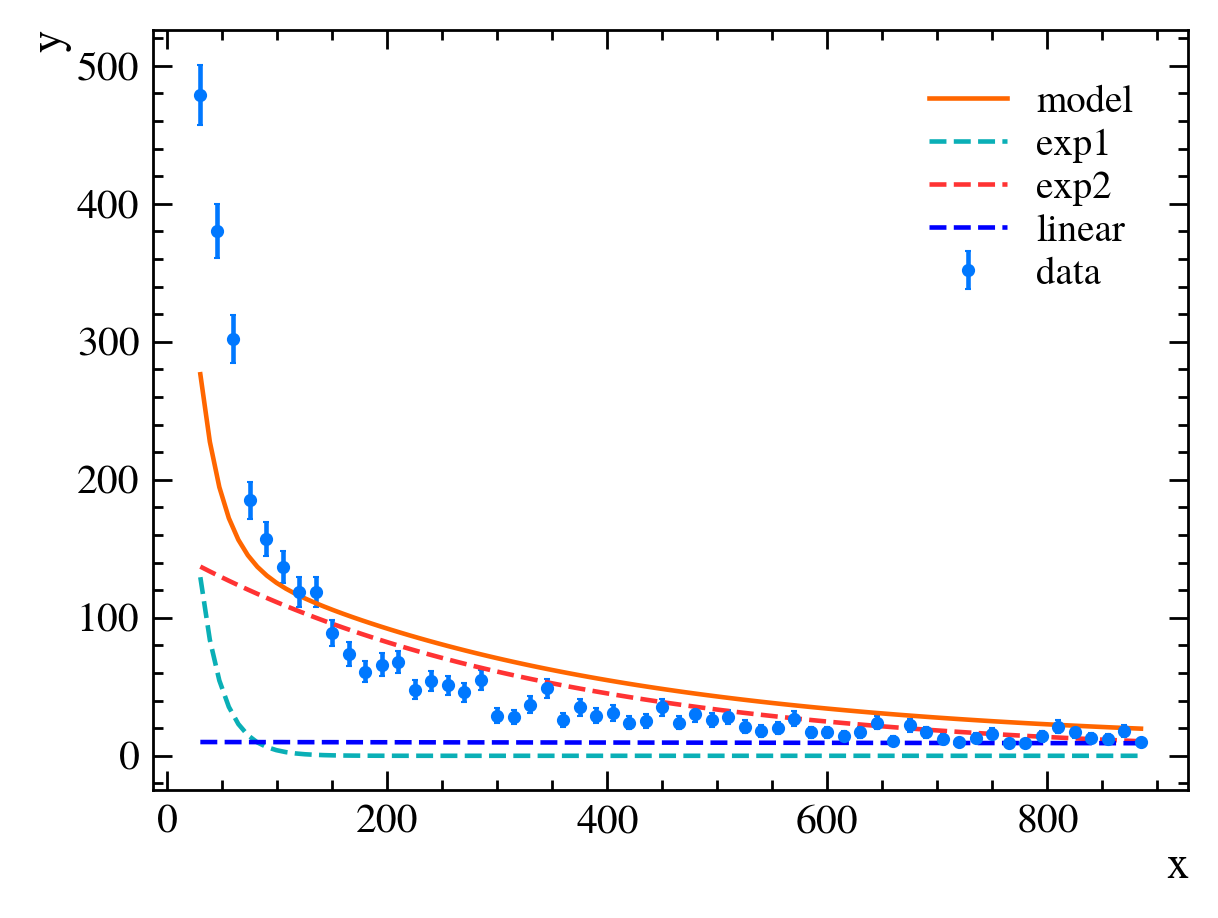

In [46]:
param_init = [100, 0.05, 100, 0.03, 100, 1]
param_init = [580, 0.05, 150, 0.003, 10, -0.001]

def plotmodel(params):
    xplot = np.linspace(np.min(x), np.max(x), 100)
    plt.figure()
    plt.errorbar(x, y, yerr=sigma, fmt='.', label="data")
    plt.plot(xplot, func(xplot, params), label="model")

    plt.plot(xplot, exponential(xplot, params[0], params[1]), '--', label="exp1")
    plt.plot(xplot, exponential(xplot, params[2], params[3]), '--', label="exp2")
    plt.plot(xplot, linear(xplot, params[4], params[5]), '--', label="linear")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

plotmodel(param_init)

In [37]:
# let's minimize that

opt = sp.optimize.minimize(chi2, param_init)

In [38]:
opt  # says False in success? What's the criterion to stop?

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 64.59613798916568
        x: [ 8.155e+02  2.372e-02  1.572e+02  1.988e-03 -6.299e+01
             5.468e-02]
      nit: 157
      jac: [ 1.049e-05 -1.578e+00  5.733e-03 -5.196e+02  2.011e-02
             1.314e+01]
 hess_inv: [[ 2.071e+03  5.195e-02 ...  2.684e+02 -1.476e-01]
            [ 5.195e-02  2.185e-06 ...  6.347e-02 -3.822e-05]
            ...
            [ 2.684e+02  6.347e-02 ...  9.558e+03 -6.038e+00]
            [-1.476e-01 -3.822e-05 ... -6.038e+00  3.824e-03]]
     nfev: 1621
     njev: 230

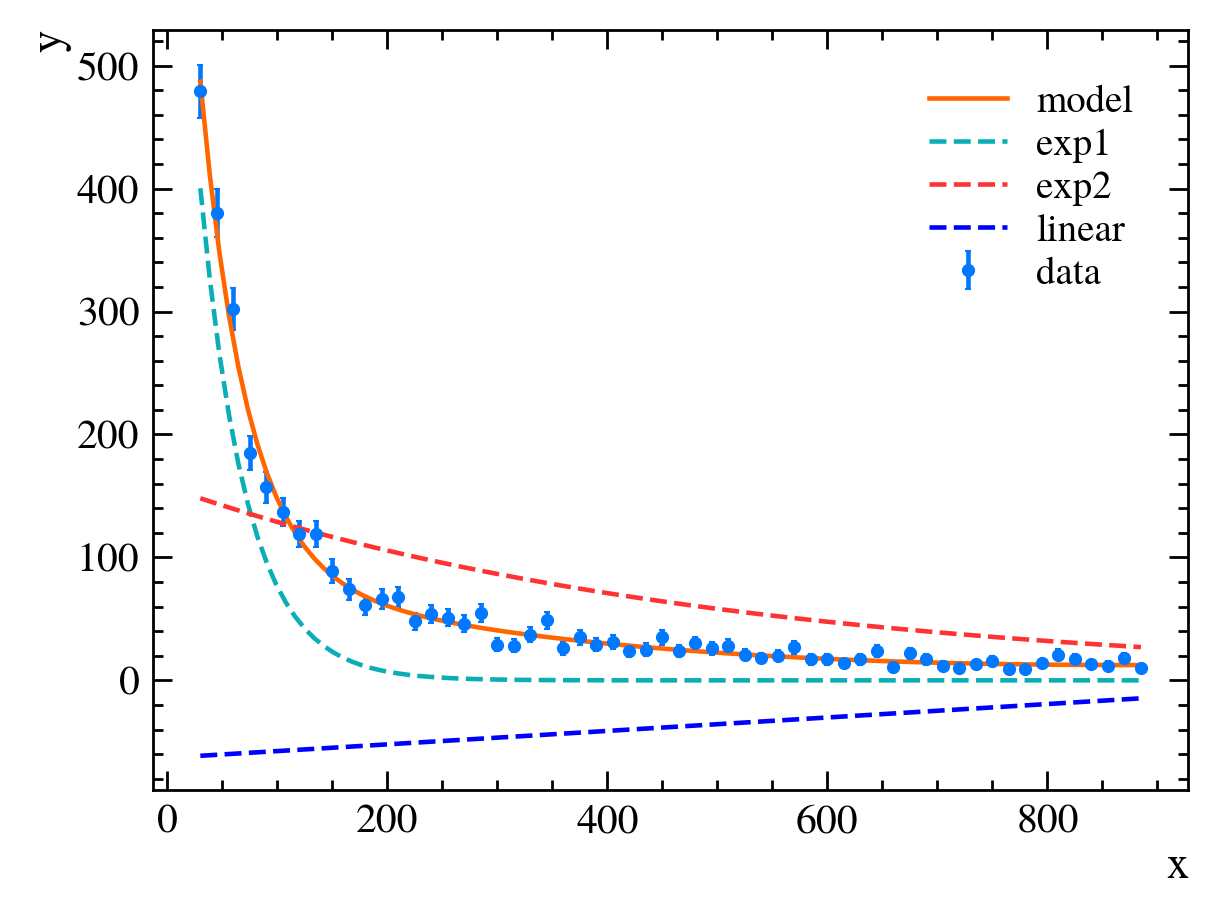

In [47]:
plotmodel(opt.x)

In [33]:
import zfit

obs = zfit.Space("x", (np.min(x), np.max(x)))

lamb1 = zfit.Parameter("lambda1", 0.05, 0.0001, 0.1)
lamb2 = zfit.Parameter("lambda2", 0.02, 0.0001, 0.1)
mlinear = zfit.Parameter("m", -0.01,-5, 5)

scale_exp1 = zfit.Parameter("yield_exp1", 300, step_size=1)
scale_exp2 = zfit.Parameter("yield_exp2", 300, step_size=1)
scale_bkg = zfit.Parameter("yield_bkg", 100, step_size=1)

exp1 = zfit.pdf.Exponential(lamb1, obs=obs, extended=scale_exp1)
exp2 = zfit.pdf.Exponential(lamb2, obs=obs, extended=scale_exp2)
bkg = zfit.pdf.Chebyshev(obs=obs, coeffs=mlinear, extended=scale_bkg)

model = zfit.pdf.SumPDF([exp1, exp2, bkg])

# here, converting it to the actual histogram can easily be done using "hist" (histogram library, standard in Python HEP)
# h = ...
# convert model to binnd with model.to_binned(binning)
# nll = zfit.loss.ExtendedBinnedChi2(model=model, data=h)

minimizer = zfit.minimize.Minuit()
# result = minimizer.minimize(nll)
# result.hesse()
# print(result)

/usr/local/lib/python3.10/dist-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
